In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [56]:
#Read Data
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies (3).csv


In [57]:
import io
df = pd.read_csv(io.BytesIO(uploaded['movies.csv']))

In [58]:
df.head()

name  ... runtime
0                                     The Shining  ...   146.0
1                                 The Blue Lagoon  ...   104.0
2  Star Wars: Episode V - The Empire Strikes Back  ...   124.0
3                                       Airplane!  ...    88.0
4                                      Caddyshack  ...    98.0

[5 rows x 15 columns]

In [59]:
#Find mising data

for col in df.columns:
  pct_missing=np.mean(df[col].isnull())
  print('{}-{}%'.format(col,pct_missing))



name-0.0%
rating-0.010041731872717789%
genre-0.0%
year-0.0%
released-0.0002608242044861763%
score-0.0003912363067292645%
votes-0.0003912363067292645%
director-0.0%
writer-0.0003912363067292645%
star-0.00013041210224308815%
country-0.0003912363067292645%
budget-0.2831246739697444%
gross-0.02464788732394366%
company-0.002217005738132499%
runtime-0.0005216484089723526%


In [60]:
#Deleting missing values
df=df.dropna(axis=0,subset=['rating'])
df=df.dropna(axis=0,subset=['released'])
df=df.dropna(axis=0,subset=['score'])
df=df.dropna(axis=0,subset=['votes'])
df=df.dropna(axis=0,subset=['writer'])
df=df.dropna(axis=0,subset=['star'])
df=df.dropna(axis=0,subset=['country'])
df=df.dropna(axis=0,subset=['budget'])
df=df.dropna(axis=0,subset=['gross'])
df=df.dropna(axis=0,subset=['company'])
df=df.dropna(axis=0,subset=['runtime'])

In [61]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [62]:
#Datatype change for cols

df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [63]:
df.head()

name  ... runtime
0                                     The Shining  ...   146.0
1                                 The Blue Lagoon  ...   104.0
2  Star Wars: Episode V - The Empire Strikes Back  ...   124.0
3                                       Airplane!  ...    88.0
4                                      Caddyshack  ...    98.0

[5 rows x 15 columns]

In [65]:
#Create Correct Year column
df['yearrcorrect']=df['released'].astype('datetime64[ns]')

In [67]:
df['yearrcorrect']=pd.DatetimeIndex(df['yearrcorrect']).year

In [70]:
df.head()

name rating  ... runtime  yearrcorrect
0                                     The Shining      R  ...   146.0          1980
1                                 The Blue Lagoon      R  ...   104.0          1980
2  Star Wars: Episode V - The Empire Strikes Back     PG  ...   124.0          1980
3                                       Airplane!     PG  ...    88.0          1980
4                                      Caddyshack      R  ...    98.0          1980

[5 rows x 16 columns]

In [73]:
df.sort_values(by=['gross'],inplace=False,ascending=False)

name  ... yearrcorrect
5445                                             Avatar  ...         2009
7445                                  Avengers: Endgame  ...         2019
3045                                            Titanic  ...         1997
6663         Star Wars: Episode VII - The Force Awakens  ...         2015
7244                             Avengers: Infinity War  ...         2018
7480                                      The Lion King  ...         2019
6653                                     Jurassic World  ...         2015
6043                                       The Avengers  ...         2012
6646                                          Furious 7  ...         2015
7494                                          Frozen II  ...         2019
6644                            Avengers: Age of Ultron  ...         2015
7247                                      Black Panther  ...         2018
5845       Harry Potter and the Deathly Hallows: Part 2  ...         2011
7075            Star Wars: Episode VIII - The Last Jedi  ...         2017
7271                     Jurassic World: Fallen Kingdom  ...         2018
6262                                             Frozen  ...         2013
7072                               Beauty and the Beast  ...         2017
7281                                      Incredibles 2  ...         2018
7055                            The Fate of the Furious  ...         2017
6244                                         Iron Man 3  ...         2013
6688                                            Minions  ...         2015
6846                         Captain America: Civil War  ...         2016
7250                                            Aquaman  ...         2018
4245      The Lord of the Rings: The Return of the King  ...         2003
7458                          Spider-Man: Far from Home  ...         2019
7456                                     Captain Marvel  ...         2019
5878                     Transformers: Dark of the Moon  ...         2011
6059                                            Skyfall  ...         2012
6494                    Transformers: Age of Extinction  ...         2014
2448                                      The Lion King  ...         1994
6047                              The Dark Knight Rises  ...         2012
7463      Star Wars: Episode IX - The Rise of Skywalker  ...         2019
7450                                              Joker  ...         2019
7488                                        Toy Story 4  ...         2019
5685                                        Toy Story 3  ...         2010
4852         Pirates of the Caribbean: Dead Man's Chest  ...         2006
6869                       Rogue One: A Star Wars Story  ...         2016
7481                                            Aladdin  ...         2019
5860        Pirates of the Caribbean: on Stranger Tides  ...         2011
7140                                    Despicable Me 3  ...         2017
2245                                      Jurassic Park  ...         1993
6908                                       Finding Dory  ...         2016
3451          Star Wars: Episode I - The Phantom Menace  ...         1999
5667                                Alice in Wonderland  ...         2010
6863                                           Zootopia  ...         2016
6045                  The Hobbit: An Unexpected Journey  ...         2012
3843              Harry Potter and the Sorcerer's Stone  ...         2001
5243                                    The Dark Knight  ...         2008
6311                                    Despicable Me 2  ...         2013
6905                                    The Jungle Book  ...         2016
7051                     Jumanji: Welcome to the Jungle  ...         2017
6455          The Hobbit: The Battle of the Five Armies  ...         2014
5060           Pirates of the Caribbean: at World's End  ...         2007
6253                The Hobbit: The Desolation of Smaug

In [72]:
pd.set_option('display.max_rows',None)

In [ ]:
#Remove Duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

In [ ]:
#correlation 


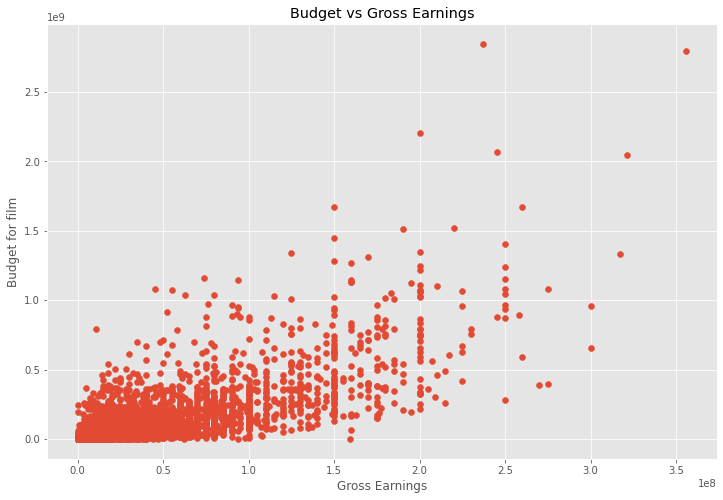

In [80]:
#scatter plot with budget vs gross
plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')
plt.show()

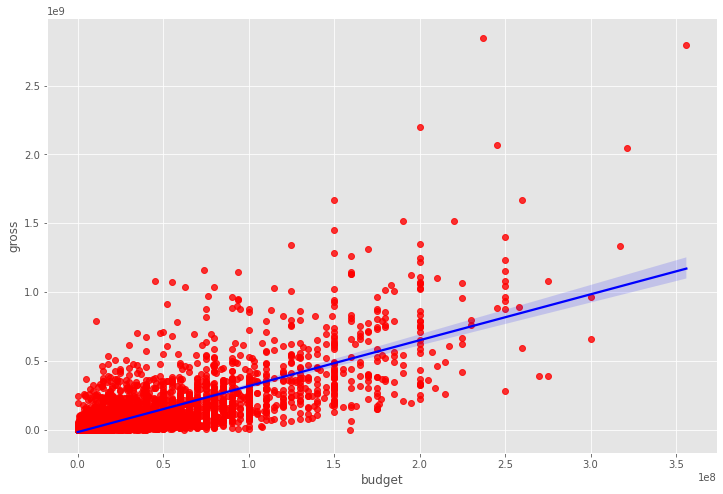

In [82]:
#Regrssion Plot using seaborn

sns.regplot(x='budget',y='gross',data=df,scatter_kws={"color":'red'},line_kws={"color":"blue"})

In [87]:
#Correlation between them
df.corr()

year     score     votes  ...     gross   runtime  yearrcorrect
year          1.000000  0.056386  0.206021  ...  0.274321  0.075077      0.970298
score         0.056386  1.000000  0.474256  ...  0.222556  0.414068      0.061248
votes         0.206021  0.474256  1.000000  ...  0.614751  0.352303      0.200154
budget        0.327722  0.072001  0.439675  ...  0.740247  0.318695      0.313917
gross         0.274321  0.222556  0.614751  ...  1.000000  0.275796      0.263048
runtime       0.075077  0.414068  0.352303  ...  0.275796  1.000000      0.075538
yearrcorrect  0.970298  0.061248  0.200154  ...  0.263048  0.075538      1.000000

[7 rows x 7 columns]

In [ ]:
#high correlation between Budget and Gross

<function matplotlib.pyplot.show>

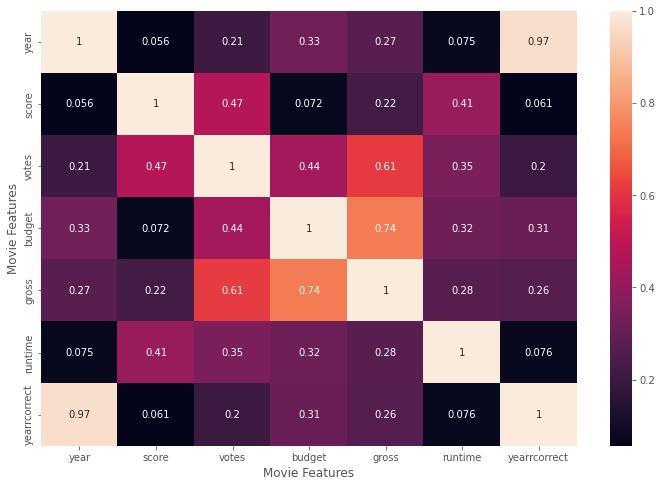

In [89]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title=("Correlation Matrix for Numeric features")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [93]:
df_numerized=df

for cols in df_numerized.columns:
  if(df_numerized[cols].dtype=='object'):
    df_numerized[cols]=df_numerized[cols].astype('category')
    df_numerized[cols]=df_numerized[cols].cat.codes

In [94]:
df_numerized

name  rating  genre  year  ...       gross  company  runtime  yearrcorrect
0     4692       6      6  1980  ...    46998772     1426    146.0          1980
1     3929       6      1  1980  ...    58853106      452    104.0          1980
2     3641       4      0  1980  ...   538375067      945    124.0          1980
3      204       4      4  1980  ...    83453539     1108     88.0          1980
4      732       6      4  1980  ...    39846344     1083     98.0          1980
5     1509       6      9  1980  ...    39754601     1108     95.0          1980
6     3930       6      0  1980  ...   115229890     1397    133.0          1980
7     3122       6      3  1980  ...    23402427      390    129.0          1980
8     3732       4      0  1980  ...   108185706      548    127.0          1981
9     4401       6      3  1980  ...    15795189     1391    100.0          1980
10     332       4      0  1980  ...    70687344     1338    116.0          1980
11    4179       4      1  1980  ...    30031783      320    109.0          1984
12    3029       4      1  1980  ...    49823037     1108    114.0          1980
13    2859       6      6  1980  ...    54766923     1108    124.0          1980
14    1208       6      5  1980  ...    31899000      661    104.0          1980
15    3553       4      6  1980  ...     9709597     1184    103.0          1980
17      66       4      4  1980  ...   103300686      815    109.0          1980
18    4143       6      9  1980  ...    21448782       45     89.0          1980
20     986       6      5  1980  ...    19814523      939    102.0          1980
21    1762       6      1  1980  ...     3484523     1114    219.0          1981
22    4128       4      0  1980  ...    16647800      306    103.0          1980
23    5289       4      8  1980  ...    22762571     1397     96.0          1980
28     700       6      5  1980  ...    37121708     1382    131.0          1980
29     261       6      5  1980  ...    22743674     1108    117.0          1980
33     785       4      6  1980  ...      534816      372     97.0          1981
35    3068       6      4  1980  ...    69847348     1426    109.0          1980
36    4245       6      4  1980  ...    10000000     1143     91.0          1980
37    2618       6      4  1980  ...     6342668      337    101.0          1980
42    4736       6      0  1980  ...     7063886      997    131.0          1980
46    4312       6      0  1980  ...    15716828     1397    109.0          1980
48    4512       4      0  1980  ...    14662035     1397     94.0          1980
50    3648       4      4  1980  ...    10389003      859     89.0          1980
51    2497       6      4  1980  ...     4309490     1397     95.0          1980
53     692       4      0  1980  ...    24265659     1426    116.0          1980
56    5193       4      0  1980  ...     3763988      841    121.0          1980
57    2818       4      4  1980  ...     6216067     1023    103.0          1980
58    4519       6      0  1980  ...    18971000      100    103.0          1980
75    4351       1      1  1980  ...    11000000     1424     97.0          1980
77    5240       6      4  1980  ...     4400000     1382    115.0          1980
80    2971       6      6  1980  ...       59167      282     94.0          1980
92    1973       4      0  1981  ...   389925971     1108    115.0          1981
94     284       6      4  1981  ...    30669378     1147     97.0          1981
95    1301       6      0  1981  ...    25244626       45     99.0          1981
96    4100       2      9  1981  ...     2956630     1197     85.0          1983
97    3031       6      4  1981  ...   111289673      158     94.0          1982
98     603       6      5  1981  ...    12000000      661    108.0          1981
99     861       4      0  1981  ...    41092328      389    118.0          1981
100   1329       6      1  1981  ...    34971136      416    140.0          1981
101   2389       6      0  1981  ... 

<function matplotlib.pyplot.show>

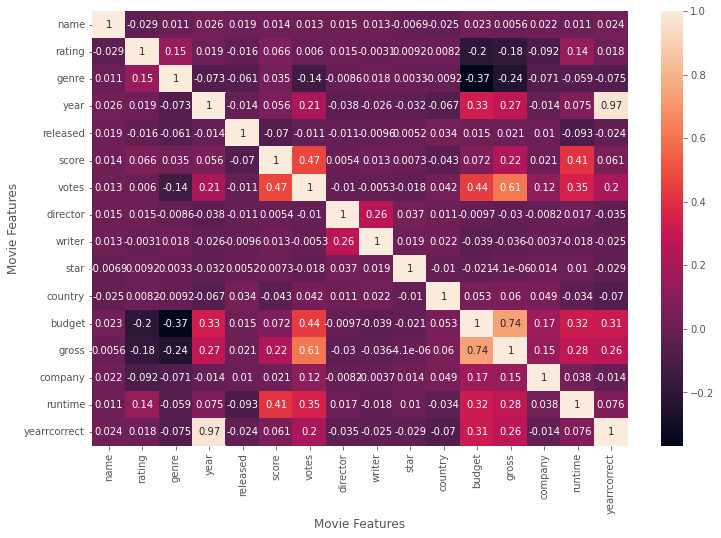

In [95]:
correlation_matrix=df_numerized.corr()
sns.heatmap(correlation_matrix,annot=True)
plt.title=("Correlation Matrix for Numeric features")
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [96]:
df_numerized.corr()

name    rating     genre  ...   company   runtime  yearrcorrect
name          1.000000 -0.029234  0.010996  ...  0.021697  0.010850      0.023955
rating       -0.029234  1.000000  0.147796  ... -0.092357  0.140792      0.017880
genre         0.010996  0.147796  1.000000  ... -0.071334 -0.059237     -0.074979
year          0.025542  0.019499 -0.073167  ... -0.014333  0.075077      0.970298
released      0.019105 -0.016234 -0.060558  ...  0.010305 -0.092509     -0.024320
score         0.014450  0.065983  0.035106  ...  0.020656  0.414068      0.061248
votes         0.012615  0.006031 -0.135990  ...  0.118470  0.352303      0.200154
director      0.015246  0.014656 -0.008553  ... -0.008223  0.017433     -0.035017
writer        0.012880 -0.003149  0.017578  ... -0.003697 -0.017561     -0.025029
star         -0.006882  0.009196  0.003341  ...  0.014082  0.010108     -0.029053
country      -0.025490  0.008230 -0.009164  ...  0.048569 -0.034477     -0.069603
budget        0.023392 -0.203946 -0.368523  ...  0.170235  0.318695      0.313917
gross         0.005639 -0.181906 -0.244101  ...  0.149553  0.275796      0.263048
company       0.021697 -0.092357 -0.071334  ...  1.000000  0.037585     -0.013647
runtime       0.010850  0.140792 -0.059237  ...  0.037585  1.000000      0.075538
yearrcorrect  0.023955  0.017880 -0.074979  ... -0.013647  0.075538      1.000000

[16 rows x 16 columns]

In [97]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released        0.019105
              score           0.014450
              votes           0.012615
              director        0.015246
              writer          0.012880
              star           -0.006882
              country        -0.025490
              budget          0.023392
              gross           0.005639
              company         0.021697
              runtime         0.010850
              yearrcorrect    0.023955
rating        name           -0.029234
              rating          1.000000
              genre           0.147796
              year            0.019499
              released       -0.016234
              score           0.065983
              votes           0.006031
              director        0.014656
              writer         -0.003149
              star       

In [100]:
sorted_pairs=corr_pairs.sort_values()

In [101]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

votes         gross           0.614751
gross         votes           0.614751
budget        gross           0.740247
gross         budget          0.740247
year          yearrcorrect    0.970298
yearrcorrect  year            0.970298
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
yearrcorrect  yearrcorrect    1.000000
dtype: float64

In [ ]:
#Votes and budget have the highest correlation to gross earnings